In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import BernoulliRBM
import matplotlib.pyplot as plt

## Importing data (just original for now)

In [2]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [3]:
data = pd.read_csv("../Data/Fangyou_data/Cleaned/combined_using_similar_columns.csv")
data['Source'] = 'Original'

In [4]:
X = data[features_num]
y = data[[y_column, 'Source', 'Xray', 'Opt_spec', 'IRAGN', 'Donley']]

## Filling nan's

In [5]:
# fill nans with 0s
X_filled = X.fillna(0)

## Normalisation (optional)

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_filled = scaler.fit_transform(X_filled)

## Running RBM

In [26]:
model = BernoulliRBM(n_components=2, learning_rate=0.01, batch_size=10, n_iter=30, verbose=10, random_state=34)

In [ ]:
X_transformed = model.fit_transform(X_filled)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -0.64, time = 1.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.60, time = 1.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.58, time = 0.67s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.57, time = 0.66s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -0.58, time = 0.65s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -0.58, time = 0.66s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -0.58, time = 0.66s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -0.56, time = 0.66s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -0.57, time = 0.66s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -0.57, time = 0.66s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -0.58, time = 0.66s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -0.57, time = 0.65s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -0.56, time = 0.67s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -0.57, time = 0.66s
[BernoulliRBM] Iteration 15, pseudo-likelih

In [21]:
X_transformed

array([[0.99297971, 0.99294541, 0.99289262, 0.99290339],
       [0.99194005, 0.99190212, 0.99184473, 0.99185468],
       [0.9926693 , 0.99263437, 0.9925812 , 0.99259103],
       ...,
       [0.99284038, 0.99280632, 0.99275416, 0.99276353],
       [0.99278357, 0.99274962, 0.99269765, 0.99270654],
       [0.99286442, 0.99283035, 0.99277815, 0.99278778]])

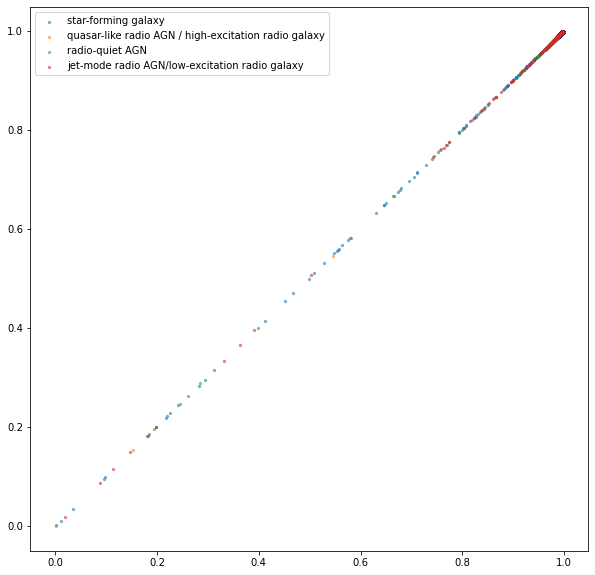

In [18]:
plt.figure(figsize=(10,10))
classes = ['star-forming galaxy',
       'quasar-like radio AGN / high-excitation radio galaxy',
       'radio-quiet AGN',
       'jet-mode radio AGN/low-excitation radio galaxy']
for i in classes:
    #filt = y.loc[sample.index]['Classification']==i
    filt = y['Classification']==i
    plt.scatter(X_transformed[:,0][filt], X_transformed[:,1][filt], s=5, alpha=0.5, label=i)
plt.legend()
plt.show()

## In a loop

Working on perplexity 60
Working on perplexity 64
Working on perplexity 68
Working on perplexity 72
Working on perplexity 76


KeyboardInterrupt: 

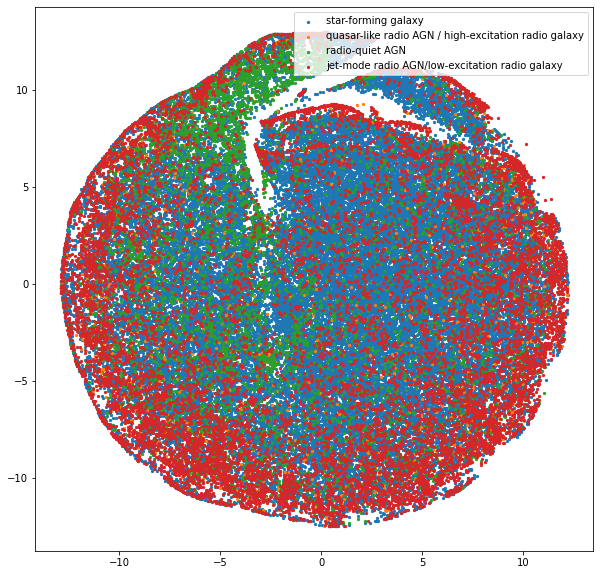

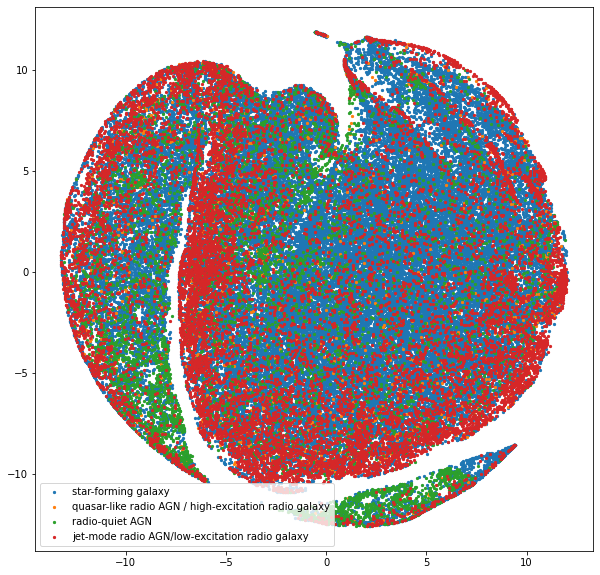

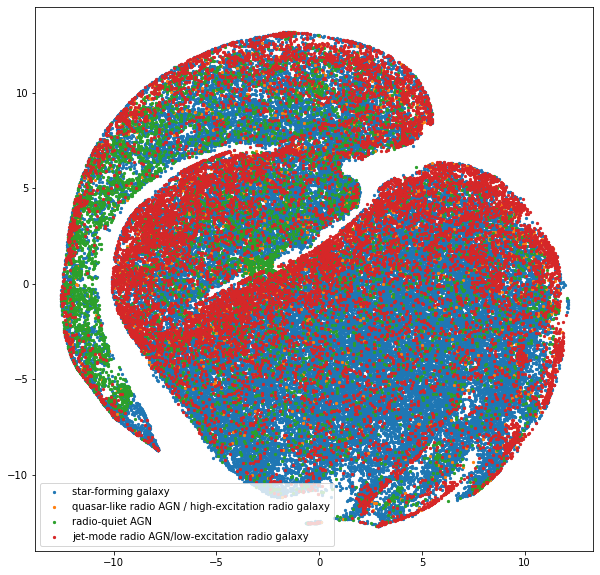

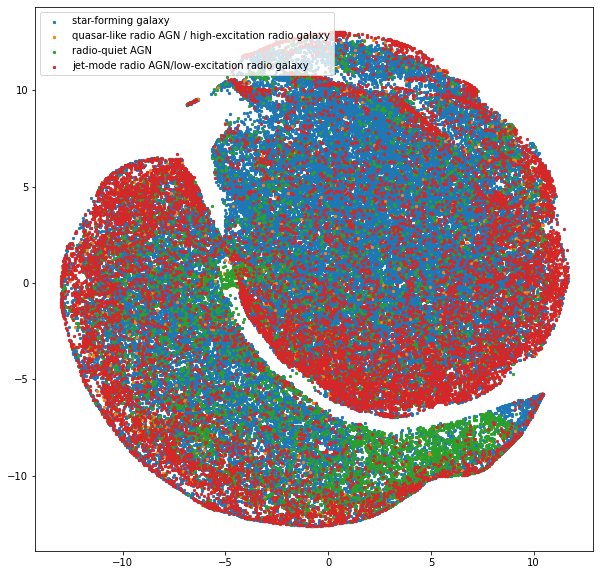

In [8]:
classes = ['star-forming galaxy',
       'quasar-like radio AGN / high-excitation radio galaxy',
       'radio-quiet AGN',
       'jet-mode radio AGN/low-excitation radio galaxy']
for i in range(60,100,4):
    print(f"Working on perplexity {i}")
    tsne = TSNE(perplexity=i, 
            init='random', 
            n_iter=10**4, 
            verbose=0, 
            n_jobs=64, 
            n_iter_without_progress=200,
            min_grad_norm=1e-3,
            learning_rate='auto'
           )
    
    X_transformed = tsne.fit_transform(X_filled)
    
    plt.figure(figsize=(10,10))
    for name in classes:
        filt = y['Classification']==name
        plt.scatter(X_transformed[:,0][filt], X_transformed[:,1][filt], s=5, label=name)
    plt.legend()
    plt.savefig(f"./Output/t-sne/{i}.png")
    